[TOC]

# # 目录
* [绘制成绩分布图](#绘制成绩分布图)
* [逻辑回归的实现思路](#逻辑回归的实现思路)
    ++ [model函数](#model函数)

In [83]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline
import matplotlib.font_manager as fm
myfont = fm.FontProperties(fname=u'C:\Windows\Fonts\simsun.ttc',size=16)

In [84]:
import os
path = 'input' + os.sep + 'logiReg_data.txt'
raw_data = pd.read_csv(path,header=None,names=['成绩1','成绩2','是否录取'])
raw_data.head()

,成绩1,成绩2,是否录取
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [85]:
raw_data.shape

(100, 3)

In [86]:
positive = raw_data[raw_data['是否录取']==1]
negative = raw_data[raw_data['是否录取']==0]

In [87]:
negative.head()

,成绩1,成绩2,是否录取
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
5,45.083277,56.316372,0
10,95.861555,38.225278,0


# 绘制成绩分布图<span id ='绘制成绩分布图'>

Text(0,0.5,'数学成绩')

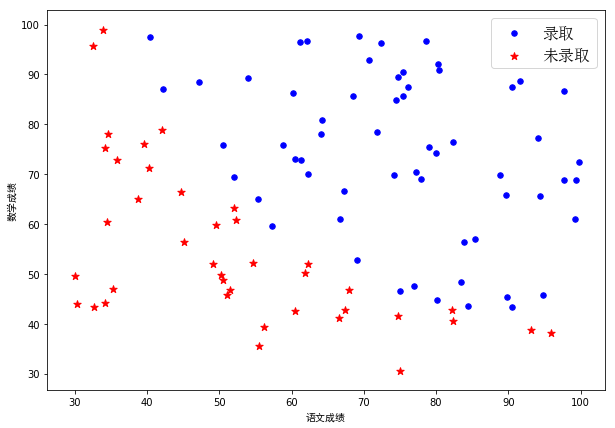

In [88]:
fig, ax = plt.subplots(figsize=(10,7))
ax.scatter(positive['成绩1'],positive['成绩2'],s=30,c='b',marker='o',label='录取')
ax.scatter(negative['成绩1'],negative['成绩2'],s = 60,c='r',marker='*',label='未录取')


ax.legend(prop=myfont) # 中文显示
ax.set_xlabel('语文成绩',fontproperties="SimHei")
ax.set_ylabel('数学成绩',fontproperties='simhei')

# 逻辑回归的实现思路<span id ='逻辑回归的实现思路'>
## 要完成的模块

* sigmoid模块
* model模块：返回预测结果，即模式
* cost模块：计算损失，实现损失函数
* gradient模块：计算每个参数的梯度方向
+ descent模块：进行参数更新
- accuracy模块：计算精度



In [89]:
def sigmoid(x):
    y = 1 / (1 + np.exp(-x))
    return y


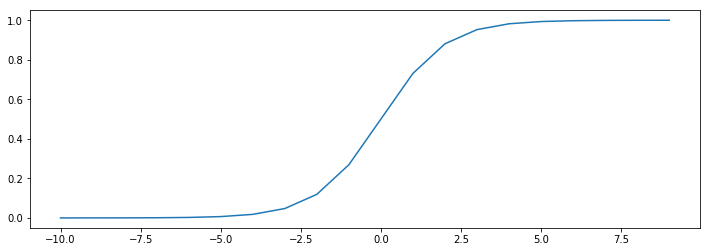

In [90]:
# 绘制sigmoid函数
nums = np.arange(-10,10,1)
fig,ax = plt.subplots(figsize=(12,4))
ax.plot(nums,sigmoid(nums))

# model模块

In [91]:
def model(X,theta):
    y = sigmoid( np.dot(X,theta.T) )
    return y

In [92]:
# 为 $theta_0$添加一列
if raw_data.columns.tolist().count('ones') == 0:
    raw_data.insert(0,'ones',1)

In [93]:
orig_data = raw_data.as_matrix()
cols = orig_data.shape[1]
X = orig_data[:,0:cols-1]
y = orig_data[:,cols-1:cols]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [94]:
theta = np.zeros([1,3])

In [95]:
theta.shape,X.shape,y.shape

((1, 3), (100, 3), (100, 1))

# 损失函数
将对数似然函数去负号
$$D(h_\theta(x),y) = -ylog(h_\theta(x) - (1 - y)log(1-h_\theta(x)))$$
求平均损失
$$J(\theta) = \frac{1}{n}\sum_{i=1}^{n}D(h_\theta(x_i),y_i)$$

In [96]:
def cost(X,y,theta):
    left = np.multiply(-y,np.log(model(X,theta)))
    right = np.multiply(1-y,np.log(1-model(X,theta)))
    #print(left)
    result = np.sum(left -right) / (len(X))
    return result

In [97]:
cost(X,y,theta)

0.6931471805599453

# 计算梯度
梯度计算公式：$$\frac{\partial J}{\partial \theta_j} = - \frac{1}{m}\sum_{i=1}^m(y_i - h_\theta(x_i))x_{i}^j$$
m：样本数量

In [98]:
def gradient(X,y,theta):
    m = len(X)
    grad = np.zeros(theta.shape)
    temp = ( model(X,theta) - y )
#     print(temp)
#     print(temp.shape)
    error = ( model(X,theta) - y )
#     print('error')
#     print(error.shape)
    # 分别计算theta0,theta1,theta2的梯度
    for j in range(len(theta.ravel())):
        term = np.multiply(error,X[:,j])
        grad[0,j] = np.sum(term) / m
    return grad

## Gradient descent，比较3种不同梯度下降方法

In [99]:
stop_iter = 0   # 迭代次数
stop_cost = 1   # 迭代损失
stop_grad = 2   # 梯度

def stopCriterion(type,value,threshold):
    #
    if type == stop_iter:  return value > threshold
    elif type == stop_cost: return abs(value[-1] - values[-2]) < threshold
    elif type == stop_grad: return np.linalg.norm(value) < threshold

In [100]:
np.linalg.norm([14,0.7,-12])

18.45237112134915

In [101]:
import numpy.random
# 洗牌，打乱数据的顺序
def shuffleData(data):
    np.random.shuffle(data)
    cols = data.shape[1]
    X = data[:,0:cols-1]
    y = data[:,cols-1]
    return X,y

In [102]:
import time
def descent(data,theta,batchSize,stopType,thresh,alpha):
    '''
    data：数据
    theta:
    batchSize：
    stopType：
    thresh：阈值，迭代次数的上限，或损失函数误差的上限，或梯度值的下限
    alpha
    '''
    # 梯度下降求解
    init_time = time.time()
    i = 0
    k = 0
    X,y = shuffleData(data)
    grad = np.zeros(theta.shape)
    costs = [cost(X,y,theta)]
#     print(X.shape)
#     print(y.shape)
    
    while True:
        grad = gradient(X[k:k+batchSize],y[k:k+batchSize],theta)
        k += batchSize # 去batch数量个数据
        if k >= n:
            k = 0
            X,y = shuffleData(data) # 重新洗牌
        theta = theta - alpha * grad
        costs.append(cost(X,y,theta))
        i += 1
        
        if stopType == stop_iter:      value = i
        elif stopType == stop_cost:    value = costs
        elif stopType == stop_grad:    value = grad
        
        if stopCriterion(stopType,value,thresh): break  
                
        
    return theta,i-1,costs,grad,time.time() - init_time

In [105]:
def runExpe(data,theta,batchSize,stopType,thresh,alpha):
    #import pdb; pdb.set_trace();
    theta, iter, costs, grad, dur = descent(data, theta, batchSize, stopType, thresh, alpha)
    name = "Original" if (data[:,1]>2).sum() > 1 else "Scaled"
    name += " data - learning rate: {} - ".format(alpha)
    if batchSize==n: strDescType = "Gradient"
    elif batchSize==1:  strDescType = "Stochastic"
    else: strDescType = "Mini-batch ({})".format(batchSize)
    name += strDescType + " descent - Stop: "
    if stopType == stop_iter: strStop = "{} iterations".format(thresh)
    elif stopType == stop_cost: strStop = "costs change < {}".format(thresh)
    else: strStop = "gradient norm < {}".format(thresh)
    name += strStop
    print ("***{}\nTheta: {} - Iter: {} - Last cost: {:03.2f} - Duration: {:03.2f}s".format(
        name, theta, iter, costs[-1], dur))
    fig, ax = plt.subplots(figsize=(12,4))
    ax.plot(np.arange(len(costs)), costs, 'r')
    ax.set_xlabel('Iterations')
    ax.set_ylabel('Cost')
    ax.set_title(name.upper() + ' - Error vs. Iteration')
    return theta

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in multiply
  This is separate from the ipykernel package so we can avoid doing imports until


***Original data - learning rate: 1e-05 - Gradient descent - Stop: 5000 iterations
Theta: [[-0.37909218  2.3441598  -1.89638894]] - Iter: 5000 - Last cost: nan - Duration: 1.52s


array([[-0.37909218,  2.3441598 , -1.89638894]])

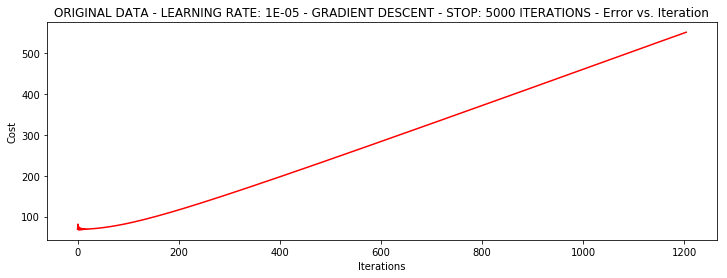

In [106]:
n=100
runExpe(orig_data,theta,100,stop_iter,thresh=5000,alpha=0.00001)